In [1]:
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gzip

from torchvision import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
#Load MNIST Data
train = datasets.MNIST('data', download=True, train=True)
test = datasets.MNIST('data', download=True, train=False)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28]) 60000 10000
3
<PIL.Image.Image image mode=L size=28x28 at 0x1B971AE0F10> 5
tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,

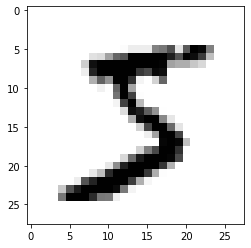

In [3]:
#Check MNIST Data
print(train.data.shape, test.data.shape, len(train.targets), len(test.targets))
print(train.data.ndim)
print(train[0][0], train[0][1])
print(train.data[:1])

plt.imshow(train.data[0].reshape(28,28), cmap='gray_r')
plt.show()

In [4]:
#Load labels function
def load_label(file_path):
    with gzip.open(file_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    #one_hot_labels = np.zeros((labels.shape[0], 10))
    #for i in range(labels.shape[0]):
        #one_hot_labels[i, labels[i]] = 1
    return labels

In [5]:
#Load image function
def load_image(file_path):
    with gzip.open(file_path, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    return images

In [6]:
#Convert Numpy function
key_file ={
    'x_train':'data/MNIST/raw/train-images-idx3-ubyte.gz',
    't_train':'data/MNIST/raw/train-labels-idx1-ubyte.gz',
    'x_test':'data/MNIST/raw/t10k-images-idx3-ubyte.gz',
    't_test':'data/MNIST/raw/t10k-labels-idx1-ubyte.gz'
}

def convert_into_numpy(key_file):
    dataset = {}

    dataset['x_train'] = load_image(key_file['x_train'])
    dataset['t_train'] = load_label(key_file['t_train'])
    dataset['x_test']  = load_image(key_file['x_test'])
    dataset['t_test']  = load_label(key_file['t_test'])

    return dataset

In [7]:
#Load MNIST formatting Numpy array function
def load_mnist():
    dataset = convert_into_numpy(key_file)
    dataset['x_train'] = dataset['x_train'].astype(np.float32)
    dataset['x_test'] = dataset['x_test'].astype(np.float32)
    dataset['x_train'] /= 255.0
    dataset['x_test'] /= 255.0
    dataset['x_train'] = dataset['x_train'].reshape(-1, 28*28)
    dataset['x_test']  = dataset['x_test'].reshape(-1, 28*28)
    return dataset

In [8]:
#Load MNIST Data formatting Numpy array
dataset = load_mnist()
X_train = dataset['x_train']
t_train = dataset['t_train']
X_test = dataset['x_test']
t_test = dataset['t_test']

In [9]:
print(X_train.shape, t_train.shape)

(60000, 784) (60000,)


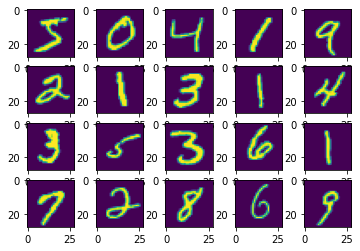

In [10]:
#Image show 
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i,:].reshape(28,28))

plt.show()

Clustering training data

In [11]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(t_train))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)
kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([6, 7, 5, ..., 5, 1, 4])

In [12]:
def retrieve_info(cluster_labels, t_train):
# Initializing
    reference_labels = {}
# For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(t_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

reference_labels = retrieve_info(kmeans.labels_, t_train)
print(reference_labels)

{0: 3, 1: 6, 2: 7, 3: 1, 4: 8, 5: 4, 6: 8, 7: 0, 8: 2, 9: 7}


In [13]:
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [14]:
print(number_labels[:20].astype(int))
print(t_train[:20])
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,t_train))

[8 0 4 1 4 2 8 3 8 8 8 1 3 6 8 8 2 8 6 8]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
0.5356166666666666


Clustering training data - increase training accuracy

In [15]:
# Function to calculate metrics for the model
def calculate_metrics(model,output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [25]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
accuracy_number = []
for i in cluster_number:
    total_clusters = len(np.unique(t_test))
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)
    # Fitting the model to training set
    kmeans.fit(X_train)
    # Calculating the metrics
    calculate_metrics(kmeans,t_train)
    # Calculating reference_labels
    reference_labels = retrieve_info(kmeans.labels_,t_train)
    # ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))
    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
    accuracy_number.append(accuracy_score(number_labels,t_train))
    print('Accuracy score : {}'.format(accuracy_score(number_labels,t_train)))
    print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clusters is 10
Inertia : 2446511.537841797
Homogeneity :       0.4202273306016577
Accuracy score : 0.5034



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clusters is 16
Inertia : 2220399.0002441406
Homogeneity :       0.5447227859576736
Accuracy score : 0.62



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clusters is 36
Inertia : 1962080.2053222656
Homogeneity :       0.676442481673892
Accuracy score : 0.75345



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clusters is 64
Inertia : 1820921.6635742188
Homogeneity :       0.7517082176939403
Accuracy score : 0.8239833333333333



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clusters is 144
Inertia : 1632809.1298828125
Homogeneity :       0.8025735008097951
Accuracy score : 0.8596333333333334



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clusters is 256
Inertia : 1516380.6159667969
Homogeneity :       0.8392185348801264
Accuracy score : 0.8954833333333333



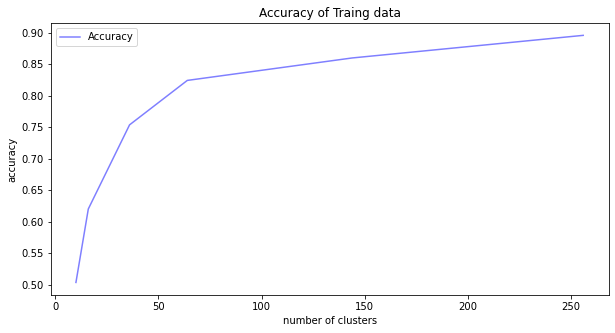

In [26]:
#Plot
plt.figure(figsize=[10,5])
plt.plot(cluster_number,accuracy_number, color='blue', linestyle='-', label='Accuracy', alpha=0.5)
plt.legend()
plt.title("Accuracy of Traing data")
plt.xlabel("number of clusters")
plt.ylabel("accuracy")
plt.show()

In [27]:
kmeans = MiniBatchKMeans(n_clusters = 256)
# Fitting the model to training set
kmeans.fit(X_train)
# Calculating the metrics
calculate_metrics(kmeans,t_train)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,t_train)

# 'number_labels' is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print("Predicted label:", number_labels[:20].astype(int))
print("True      label:", t_train[:20])
print('Accuracy score : {}'.format(accuracy_score(number_labels,t_train)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of clusters is 256
Inertia : 1515808.8021240234
Homogeneity :       0.8352916740911609
Predicted label: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
True      label: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
Accuracy score : 0.8894833333333333


Visualize Centriods

In [28]:
# Cluster centroids is stored in ‘centroids’
centroids = kmeans.cluster_centers_
centroids.shape


(256, 784)

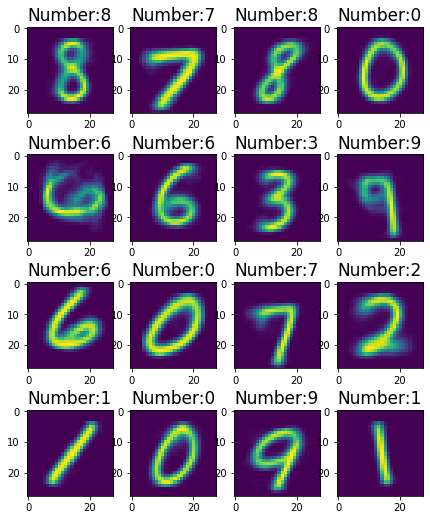

In [29]:
centroids = centroids.reshape(256,28,28)
centroids = centroids * 255
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
    plt.imshow(centroids[i])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


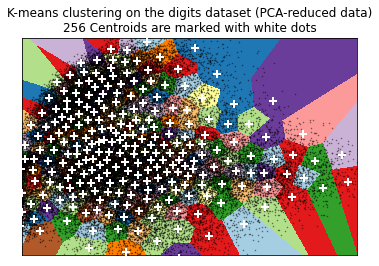

In [30]:
from sklearn import decomposition
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = decomposition.PCA(n_components=2).fit(X_train.astype(np.double))
reduced_X_train = pca.transform(X_train.astype(np.double))
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will asign a color to each
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

kmeans_vis = MiniBatchKMeans(n_clusters = 256)
kmeans_vis.fit(reduced_X_train)
Z = kmeans_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

#print reduced_X_train.shape
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=1, alpha=0.5)

# Plot the centroids as a white X
centroids = kmeans_vis.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='+', s=50, linewidths=2,
           color='w', zorder=10)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
         '256 Centroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Prediction and Evaluation

In [31]:
# Predict clusters on testing data
p_cluster = kmeans.predict(X_test)

pred_test = np.random.rand(len(p_cluster))
for i in range(len(p_cluster)):
    pred_test[i] = reference_labels[p_cluster[i]]

print("Predicted label:", pred_test[:10].astype(int))
print("True      label:", t_test[:10])

Predicted label: [7 2 1 0 9 1 4 9 9 9]
True      label: [7 2 1 0 4 1 4 9 5 9]


In [32]:
import umsgpack

# Classify all the test data
fit = {}
fit["true_label"] = []
fit["predicted"] = []
for i in range(len(t_test)):
    print(i)
    fit["true_label"].append(int(t_test[i]))
    fit["predicted"].append(int(pred_test[i]))

# Store MessagePack
with open("data/kmeans.msg", "wb") as fp:
    packed = umsgpack.packb(fit)
    fp.write(packed)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351


4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350


6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477


8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348


In [33]:
# Accuracy, Precision, Recall, F1-score
with open("data/kmeans.msg", "rb") as fp:
    fit = umsgpack.unpack(fp)

#print(fit)
print("Accuracy: {}".format(accuracy_score(fit[b'true_label'], fit[b'predicted'])))
print("Precision: {}".format(precision_score(fit[b'true_label'], fit[b'predicted'], average="macro")))
print("Recall: {}".format(recall_score(fit[b'true_label'], fit[b'predicted'], average="macro")))
print("F1-score: {}".format(f1_score(fit[b'true_label'], fit[b'predicted'], average="macro")))
#print(f1_score(fit[b'true_label'], fit[b'predicted'], average=None))
#print(f1_score(fit[b'true_label'], fit[b'predicted'], average="weighted"))

print(classification_report(fit[b'true_label'], fit[b'predicted'], target_names=["0","1","2","3","4","5","6","7","8","9"]))

Accuracy: 0.8964
Precision: 0.8971962867204581
Recall: 0.8948591732404815
F1-score: 0.8949227219337711
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.96      0.99      0.97      1135
           2       0.91      0.91      0.91      1032
           3       0.86      0.90      0.88      1010
           4       0.91      0.79      0.84       982
           5       0.89      0.86      0.87       892
           6       0.93      0.97      0.95       958
           7       0.93      0.87      0.90      1028
           8       0.89      0.82      0.85       974
           9       0.77      0.86      0.81      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.90     10000

